<a href="https://colab.research.google.com/github/ipsita617/Machine-learning-/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a=[2,3,2,3,4,6,3,4,4,4,4,1,2,1,2,0]
#finding unique elements in a
unique=[]
unique.append(a[0])
for ele in a:
  for val in unique:
    if(ele != val):
      unique.append(ele)
      break

print(unique)      

[2, 3, 2, 3, 4, 6, 3, 4, 4, 4, 4, 1, 2, 1, 2, 0]


In [ ]:
import pandas as pd #for one hot encoding and manipulating data
import numpy as np #to calculate mean and std. deviation
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #to build classification tree
from sklearn.tree import plot_tree # to draw classification tree
from sklearn.model_selection import train_test_split #to split data
from sklearn.model_selection import  cross_val_predict #for cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE


In [ ]:
# df=pd.read_csv('processed.cleveland.data',header=None)
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.columns=['age', #change column number to names
            'sex', # 0:female,1:male
            'cp', # chest pain -> 1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic
            'restbp', #resting blood pressure (in mm Hg),Float
            'chol', #serum cholestrol
            'fbs', #fasting blood sugar, Category -> 0 =>120mg/dl, 1=<120 mg/dl
            'restecg', #resting electrocardiographic results,Category -> 1=normal,2: ST-T wave abnormality,3: probable/definite left ventricular hypertrophy
            'thalach',#maximum heart rate achieved
            'exang', #exercise induced angina, 0=no,1=yes 
            'oldspeak',#ST depression induced by exercise relative to rest
            'slope', #slope of peak exercise ST segment -> 1=unsloping,2=flat,3=downsloping
            'ca',#no.of major vessels(0-3) coloured by fluroscopy
            'thal', #thalium heart scan -> 3=normal,6=fixed defect(cold spots during rest and exercise)
            'hd' ] #heart disease 
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldspeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# identifying and dealing with missing data
df.dtypes 

age         float64
sex         float64
cp          float64
restbp      float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldspeak    float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [ ]:
df['ca'].unique() #object data type have mixture of things(numbers and letters)

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
#since scikit-learn's classification trees do not support dataset with missing values ,we can either
#delete these patients or impute (smart guess) values for missing data points.
len(df.loc[(df['ca'] == '?') | (df['thal']== '?')]) #how many rows have '?

6

In [ ]:
df.loc[(df['ca'] == '?') | (df['thal']== '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldspeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
len(df)

303

In [ ]:
# pruning the missing values

In [ ]:
#deleting the rows with missing values
data_without_missing_value=df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [ ]:
len(data_without_missing_value)

297

In [ ]:
#verifying the data again for no missing value
data_without_missing_value['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
data_without_missing_value['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [ ]:
#format the data: split the data into 2 parts for training and testing
training_data=data_without_missing_value.drop('hd',axis=1).copy()
training_data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldspeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
test_column=data_without_missing_value['hd'].copy()
test_column.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [ ]:
# Since whole dataset is float64, we want to modify datatypes according to
# categories .Sk-learn takes only continous values of data so categories have been assigned numbers 
# But numbers create a relation between them of weitage which we do not want as blood group  are equal valued but different.
# So we have to one-hot encode the categorical columns.

In [ ]:
pd.get_dummies(training_data,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldspeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [ ]:
training_data_encoded=pd.get_dummies(training_data,columns=['cp',
                                                            'restecg',
                                                            'slope',
                                                            'thal'])
training_data_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldspeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
# test_column has five different levels(0 to 4 in value) of heart disease so we
#need to convert numbers>0 as 1
test_column.unique() 

array([0, 2, 1, 3, 4])

In [ ]:
# for simple classification implementation of trees, we convert hd from 0 to 1 
test_column_not_zero= test_column>0
test_column[test_column_not_zero]=1
test_column.unique()

array([0, 1])

In [ ]:
### Training the Model

In [ ]:
# Building the Random Forest
X_train ,X_test, y_train,y_test  =  train_test_split(training_data_encoded,test_column,random_state=42)
Random_forest  = RandomForestClassifier(n_estimators=100,   # Create the model with 100 trees
                               bootstrap = True,
                               max_features = 'sqrt')
Random_forest.fit(X_train, y_train) # Fit on training data

RandomForestClassifier(max_features='sqrt')

In [ ]:
from sklearn.metrics import classification_report
y_pred_en = Random_forest.predict(X_test)
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.88      0.88      0.88        33

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



In [ ]:
#check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8933


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(Random_forest.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(Random_forest.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8933


In [ ]:
# Feature Importance in the dataset
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': Random_forest.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [ ]:
fi

,feature,importance
8,ca,0.124108
5,thalach,0.119475
7,oldspeak,0.099431
3,chol,0.088203
0,age,0.087774
19,thal_3.0,0.082500
2,restbp,0.076194
12,cp_4.0,0.074681
6,exang,0.042468
21,thal_7.0,0.040152


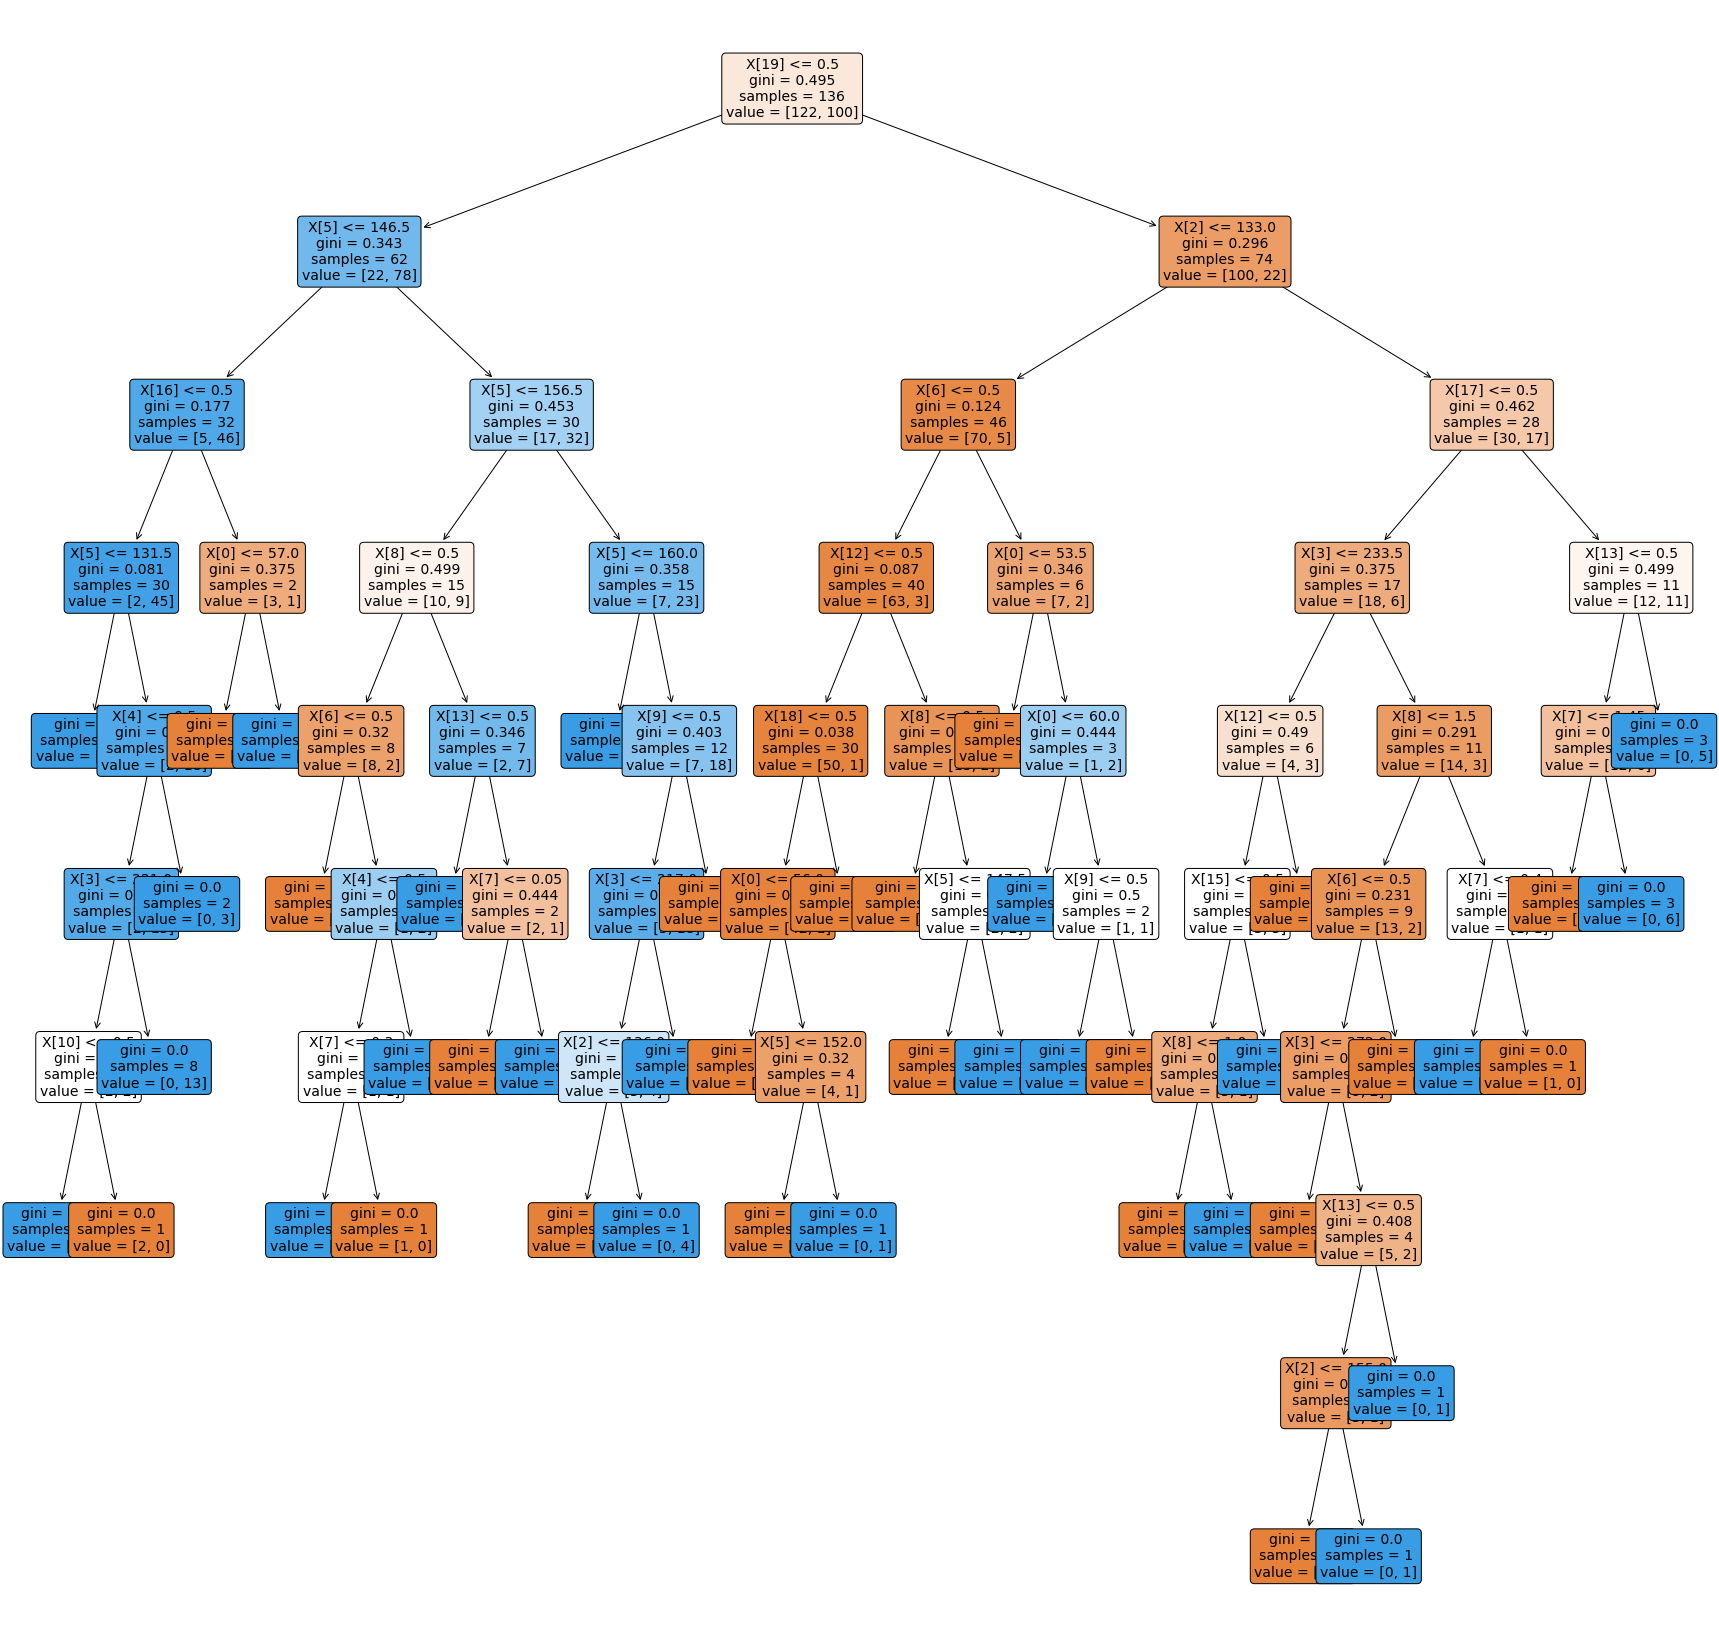

In [ ]:
# plotting one tree from the forest
import pydot
# Pull out one tree from the forest
Tree = Random_forest.estimators_[10]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);